In [2]:
import json
import requests
import pandas as pd
from config import api_key
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# Zillow Data URL
URL_Data_Csv = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA.json?qopts.export=true&api_key={api_key}")

# API Call
data_csv = requests.get(URL_Data_Csv).json()

In [4]:
# Retrieve csv download link
data_link = data_csv['datatable_bulk_download']['file']['link']
data_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/DATA/ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.zip?X-Amz-Expires=1800&X-Amz-Date=20231009T035200Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEKv//////////wEaCXVzLWVhc3QtMSJHMEUCIDG%2BX2CZqiYxMtZqPSL%2Bux2y7hdEsJg5jdd%2BUFZAwUaCAiEAyT2etKWvye2%2BwO3iflbDSlGPoRqSW9R6JBWsVDsDL7kqvAUItP//////////ARACGgwzMDYzMjA1MDAyMDQiDKSHLdv1FL9EC/W8KiqQBdyeex/rTo0q534J3yag3WQxpBcq8K68SwvAiEQq628pweheZzn3rsXU/uvGLiulMlzVF8tBlylCi1BXsFX3ZgnxvygDJvb3ZqAj7C7GX42nxIME/kJHUXrw2F3ybfJsjpedZkKFxxWy0RS7bZinrf4s1TFzjZusTSm8/iw3TJST2KWq8zTpKVRHzrKiKD/VwjtxIrZgbQ3qN%2Bd%2BKytCJSMzajQVNRchptkr8zZsgQX1LY3Cg4g8jaOPrXSfhfjzEuJQlpCqIFxpmmedEmFnG4qPQVA8MeH5DZqbrz8RGo2RVb9IlnRDqxzfplL23qx%2BoUiu8TE/scGU31u5zQTtZFxHQ%2BY%2BKR9QJg3ANUKicB8Wj3p2R9k5%2B7Awlc7G5QRNxzMdVxgWrdIKAydB45BjdGN2R80CIMmeGydfvjyNtx5n8VWux05Yt7yNZPz2P9GufMo%2Bj9ddi21Evex/ycVORhokLfjkhBGM%2Bz1jtQcTVAo0tofnGL1peEQvaq8lp72U9XjFX57dUkzlGRMJEk4x3Zsn7GQBYxWdWKDPRHalYbBFOpRbk74y2qJEFewiCqv8Wy7Kd71B

In [4]:
# CSV File Paths
path_data = Path("Resources", "Zillow_Data.csv")

# Create DataFrames for the CSV Files
data_df = pd.read_csv(path_data)
data_df

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.000000
1,ZATT,3101,1998-02-28,342993.000000
2,ZATT,3101,1998-03-31,346763.000000
3,ZATT,3101,1998-04-30,349356.000000
4,ZATT,3101,1998-05-31,351981.000000
...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088
150217957,Z4BR,51236,2023-08-31,197282.405592
150217958,Z4BR,22166,2023-08-31,321075.347722
150217959,Z4BR,54589,2023-08-31,144402.793079


In [5]:
# Zillow Indicators URL
URL_Indicators = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key={api_key}")

# API Call
response_ind = requests.get(URL_Indicators).json()

# Create Indicators DataFrame
indicators_df = pd.DataFrame(response_ind['datatable']['data'])

# Rename columns
indicators_df = indicators_df.rename(columns = {0: 'indicator_id', 
                          1: 'indicator', 
                          2: 'category',
                                               })

indicators_df.head()

,indicator_id,indicator,category
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [6]:
# Zillow Regions URL
URL_Regions = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS.json?qopts.export=true&api_key={api_key}")

# API Call
regions_csv = requests.get(URL_Regions).json()

In [7]:
# Retrieve csv download link
regions_link = regions_csv['datatable_bulk_download']['file']['link']
regions_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/REGIONS/ZILLOW_REGIONS_1a51d107db038a83ac171d604cb48d5b.zip?X-Amz-Expires=1800&X-Amz-Date=20231005T224851Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEF8aCXVzLWVhc3QtMSJHMEUCIQDCBNiwGbHk8c7qC88umajJ6JmxQ0HDHAnif8Cp058ddwIgUAOItYchp8WLQoEimCcQ0rUyaDUi6ricxqZRRvEwJBYqtAUIZxACGgwzMDYzMjA1MDAyMDQiDKiwIKtAGB0GPUozqCqRBao8Dn/cGPWy8x%2BRL7cJO3gPNs5kQfI3qZLBWLKg6nNncKHE/g0PhqwYOQcf1NUmRl6P04O0DNoMllPchpxHJgMuqWmAY79WjSZisHpZB1pbdT0CtzLEo%2B%2B5lUOYOuYzc6r1XFkpBaxq5/T6n7%2B8kMbA7HruX8eVdgVDBoMUji1xWeEnzfksYEZP1b2zK7CsUKdEh04tXi78wofswXk7YebDgnnlDg21l2heasTg4ZxogD%2BzpqAF5Ee1QvAPBDx/%2BCFebXEXGh9lFdmtsKvn3s09sZBaeDvVk/DRYPdTWtxRu97aqGL2q5I4oN3LGL6Y9mBcaQSVx1Y/Cr7HvoY3%2BRPS1Q6lH7yMvn/ITcCYhbuFarNoyT2n5r%2BPt3afqzsPPREOdgFlDvjKXnZur3ibjaEG9eREiiz8OlUQkveleiaJz9Dyx5i0TcaIFMNTas0%2BHpZEgPx2kxNR%2BaADG66/RLKPvBPPOW/BTw4xxXI5WbwuqGTe/5dqEMLGU7ukqKFqELQeRaNJeU8Qbmts1wImfI8AbJHlMi7hTwkXbkhSnsohdFKgPTYrBZbokdl8LLb1OFMOZpb6smfOZSDfqVaFDoe4UfXthz

In [8]:
# CSV File Paths
path_regions = Path("Resources", "Zillow_Regions.csv")

# Create DataFrames for the CSV Files
regions_df = pd.read_csv(path_regions)
regions_df

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,196538,neigh,Murray Hill; NY; New York-Newark-Jersey City; ...
...,...,...,...
89300,87837,zip,"68058;NE;Omaha-Council Bluffs, NE-IA;South Ben..."
89301,61652,zip,"10038;NY;New York-Newark-Jersey City, NY-NJ-PA..."
89302,79935,zip,49777;MI;nan;Presque Isle;Presque Isle County
89303,62010,zip,"11109;NY;New York-Newark-Jersey City, NY-NJ-PA..."


In [9]:
# Merge the Data and Indicator DataFrames
df_12 = pd.merge(data_df, indicators_df, on = 'indicator_id', how = 'left')
df_12

,indicator_id,region_id,date,value,indicator,category
0,ZATT,3101,1998-01-31,338849.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,1998-02-28,342993.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,1998-03-31,346763.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,1998-04-30,349356.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,1998-05-31,351981.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
...,...,...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088,ZHVI 4-Bedroom Time Series ($),Home values
150217957,Z4BR,51236,2023-08-31,197282.405592,ZHVI 4-Bedroom Time Series ($),Home values
150217958,Z4BR,22166,2023-08-31,321075.347722,ZHVI 4-Bedroom Time Series ($),Home values
150217959,Z4BR,54589,2023-08-31,144402.793079,ZHVI 4-Bedroom Time Series ($),Home values


In [10]:
# Merge all DataFrames
merged_df = pd.merge(df_12, regions_df, on = 'region_id') 
merged_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZATT,3101,1998-01-31,338849.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
1,ZATT,3101,1998-02-28,342993.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
2,ZATT,3101,1998-03-31,346763.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
3,ZATT,3101,1998-04-30,349356.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
4,ZATT,3101,1998-05-31,351981.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
...,...,...,...,...,...,...,...,...
150217956,Z3BR,65461,2020-02-29,129328.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217957,Z3BR,65461,2020-03-31,128308.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217958,Z3BR,65461,2020-04-30,126284.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217959,Z3BR,65461,2020-05-31,124288.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...


In [11]:
# Isolating for State rows only
bystate_df = merged_df[merged_df['region_type'] == 'state']
bystate_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
2706868,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
2706869,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2706870,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706871,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706872,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
73310371,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
73310372,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
73310373,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
73310374,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [12]:
# Save DF to CSV
bystate_df.to_csv('Resources/bystate.csv', index=False)

In [5]:
# Call in csv
path_cleaning = Path("Resources", "bystate.csv")

cleaning_df = pd.read_csv(path_cleaning)
cleaning_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
1,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
3,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
4,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
166796,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
166797,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
166798,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
166799,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [6]:
# Remove these columns
cleaning_df = cleaning_df.drop(['region_id', 'category', 'region_type'], axis=1)

# Remove these rows
cleaning_df = cleaning_df[cleaning_df['indicator'] != 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)']
cleaning_df

,indicator_id,date,value,indicator,region
0,Z5BR,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut
1,Z4BR,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut
2,ZATT,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut
3,ZATT,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut
4,ZATT,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut
...,...,...,...,...,...
166795,Z4BR,2005-01-31,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana
166797,ZCON,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana
166798,ZABT,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana
166799,Z5BR,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana


In [7]:
cleaning_df['indicator'].unique()

array(['ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 4-Bedroom Time Series ($)',
       'ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI 1-Bedroom Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 3-Bedroom Time Series ($)'], dtype=object)

In [8]:
# switch date column to date time type
cleaning_df['date'] = pd.to_datetime(cleaning_df['date'])

# add year column
cleaning_df['year'] = cleaning_df['date'].dt.year

# drop original date column
cleaning_df = cleaning_df.drop(['date'], axis = 1)
cleaning_df

,indicator_id,value,indicator,region,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [9]:
# rename columns to more easily understood names
cleaning_df = cleaning_df.rename(columns = {'value': 'price', 'region': 'state', 'indicator': 'property type'})
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [10]:
# switch price column to integer
cleaning_df['price'] = cleaning_df['price'].astype('int64')
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [11]:
# add dollar variabe

#add_dollar = lambda x: f'${x}'

# add $ to price column
#cleaning_df['price'] = cleaning_df['price'].apply(add_dollar)
#cleaning_df

In [12]:
# rename property type values to more easily understood names
cleaning_df['property type'] = cleaning_df['property type'].replace({'ZHVI 5+ Bedroom Time Series ($)': '5+ bedroom homes',
                                                            'ZHVI 4-Bedroom Time Series ($)': '4 bedroom homes',
                                                            'ZHVI Single-Family Homes Time Series ($)': 'single-family homes',
                                                            'ZHVI All Homes- Bottom Tier Time Series ($)': 'All home type - bottom tier',
                                                            'ZHVI 3-Bedroom Time Series ($)': '3 bedroom homes',
                                                            'ZHVI 2-Bedroom Time Series ($)': '2 bedroom homes',
                                                            'ZHVI All Homes- Top Tier Time Series ($)': 'All home types - top tier',
                                                            'ZHVI Condo/Co-op Time Series ($)': 'condos',
                                                            'ZHVI 1-Bedroom Time Series ($)': '1 bedroom homes'})
cleaning_df                               

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881,4 bedroom homes,Montana,2005
166797,ZCON,428889,condos,Montana,2023
166798,ZABT,262530,All home type - bottom tier,Montana,2023
166799,Z5BR,606670,5+ bedroom homes,Montana,2023


In [13]:
# Reset index
cleaning_df = cleaning_df.reset_index(drop=True)
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
150087,Z4BR,198881,4 bedroom homes,Montana,2005
150088,ZCON,428889,condos,Montana,2023
150089,ZABT,262530,All home type - bottom tier,Montana,2023
150090,Z5BR,606670,5+ bedroom homes,Montana,2023


In [20]:
# consider reducing dataset to (2012-2023) years ....
reduced_year_df=cleaning_df[(cleaning_df['year']>=2012) & (cleaning_df['year']<=2022)]
reduced_df=reduced_year_df[cleaning_df['state']=='California']
reduced_df=reduced_df.astype({'price' : 'int64'})
reduced_df


/var/folders/3x/qx01f_zs0f56dh_9xblp7nh40000gp/T/ipykernel_7899/85066423.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reduced_df=reduced_year_df[cleaning_df['state']=='California']


,indicator_id,price,property type,state,year
9119,ZATT,570824,All home types - top tier,California,2012
9120,ZATT,569731,All home types - top tier,California,2012
9121,ZATT,568637,All home types - top tier,California,2012
9122,ZATT,568175,All home types - top tier,California,2012
9123,ZATT,569172,All home types - top tier,California,2012
...,...,...,...,...,...
11516,Z4BR,917020,4 bedroom homes,California,2022
11517,Z4BR,906451,4 bedroom homes,California,2022
11518,Z4BR,897127,4 bedroom homes,California,2022
11519,Z4BR,889878,4 bedroom homes,California,2022


In [21]:
import matplotlib.pyplot as plt
reduced_grouped= reduced_df.groupby(['property type','year'])
CA_group=reduced_grouped.mean()['price']
CA_group_df = CA_group.to_frame()
CA_group_df=CA_group_df.reset_index()
CA_group_df


/var/folders/3x/qx01f_zs0f56dh_9xblp7nh40000gp/T/ipykernel_7899/2199026874.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_group=reduced_grouped.mean()['price']


,property type,year,price
0,1 bedroom homes,2012,170021.083333
1,1 bedroom homes,2013,211739.666667
2,1 bedroom homes,2014,256020.250000
3,1 bedroom homes,2015,279457.333333
4,1 bedroom homes,2016,304926.833333
...,...,...,...
94,single-family homes,2018,538339.833333
95,single-family homes,2019,553836.166667
96,single-family homes,2020,582966.583333
97,single-family homes,2021,678295.583333


In [22]:

CA_group_df=CA_group_df.rename(columns={'price':'avg_price'})
CA_group_df['property type'].value_counts()

1 bedroom homes                11
2 bedroom homes                11
3 bedroom homes                11
4 bedroom homes                11
5+ bedroom homes               11
All home type - bottom tier    11
All home types - top tier      11
condos                         11
single-family homes            11
Name: property type, dtype: int64

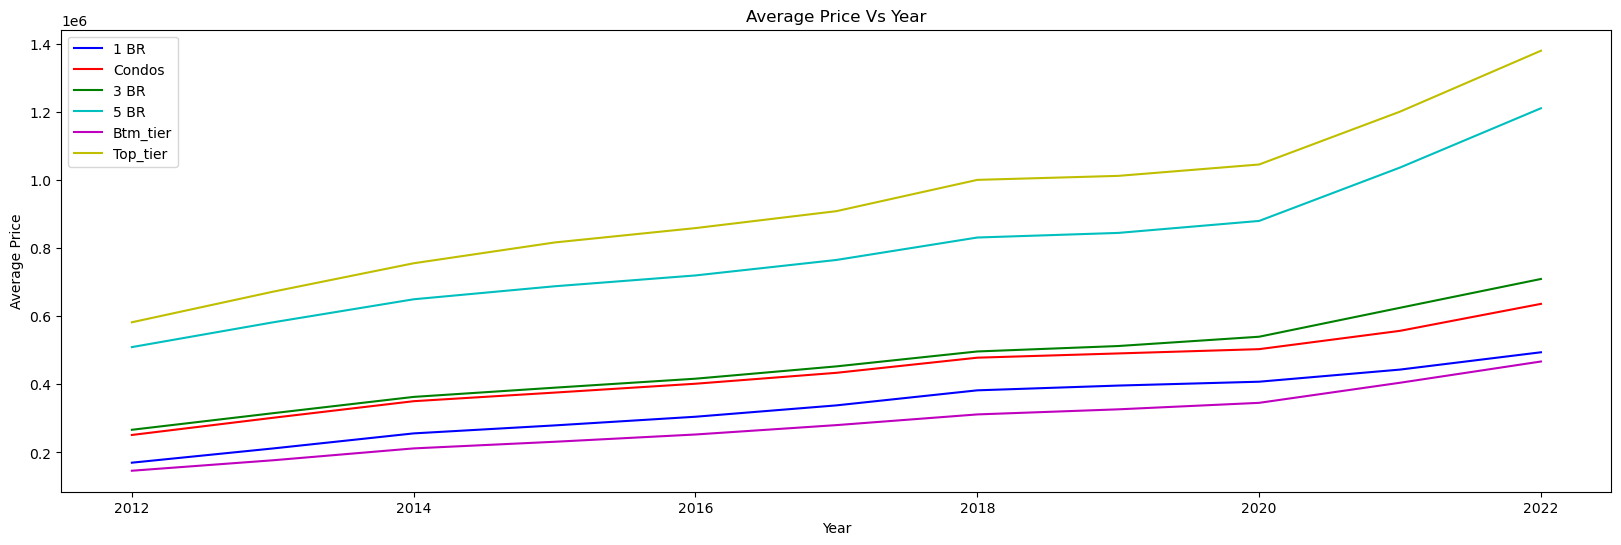

In [44]:
import matplotlib.pyplot as plt

CA_1BR_df=CA_group_df[CA_group_df['property type']=='1 bedroom homes']
CA_Con_df=CA_group_df[CA_group_df['property type']=='condos']
CA_3BR_df=CA_group_df[CA_group_df['property type']=='3 bedroom homes']
CA_5BR_df=CA_group_df[CA_group_df['property type']=='5+ bedroom homes']
CA_Btm_df=CA_group_df[CA_group_df['property type']=='All home type - bottom tier']
CA_Top_df=CA_group_df[CA_group_df['property type']=='All home types - top tier']

plt.figure(figsize=(20, 6))
one_BR,=plt.plot(CA_1BR_df['year'], CA_1BR_df['avg_price'], color='b', label='1 BR')
con_BR,=plt.plot(CA_Con_df['year'], CA_Con_df['avg_price'], color='r', label='Condos')
three_BR,=plt.plot(CA_3BR_df['year'], CA_3BR_df['avg_price'], color='g', label='3 BR')
five_BR,=plt.plot(CA_5BR_df['year'], CA_5BR_df['avg_price'], color='c', label='5 BR')
btm_tier,=plt.plot(CA_Btm_df['year'], CA_Btm_df['avg_price'], color='m', label='Btm_tier')
top_tier,=plt.plot(CA_Top_df['year'], CA_Top_df['avg_price'], color='y', label='Top_tier')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Vs Year')
plt.legend(handles=[one_BR,con_BR, three_BR, five_BR, btm_tier, top_tier], loc="best")
plt.show()

In [46]:

California_df= pd.DataFrame({ "Property type" : ['1 bedroom homes', 'condos', '3 bedroom homes', '5+ bedroom homes', 'All home type - bottom tier', 'All home type - Top tier'],
                             "2012_value": [ CA_1BR_df.loc[CA_1BR_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_Con_df.loc[CA_Con_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_3BR_df.loc[CA_3BR_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_5BR_df.loc[CA_5BR_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_Btm_df.loc[CA_Btm_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_Top_df.loc[CA_Top_df['year'] == 2012, 'avg_price'].values[0]],
                             
                             "2022_value":[ CA_1BR_df.loc[CA_1BR_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_Con_df.loc[CA_Con_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_3BR_df.loc[CA_3BR_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_5BR_df.loc[CA_5BR_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_Btm_df.loc[CA_Btm_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_Top_df.loc[CA_Top_df['year'] == 2022, 'avg_price'].values[0]],
                             "CAGR" : ""
    
})
California_df

,Property type,2012_value,2022_value,CAGR
0,1 bedroom homes,170021.083333,4.941858e+05,
1,condos,251373.416667,6.362825e+05,
2,3 bedroom homes,266629.333333,7.093828e+05,
3,5+ bedroom homes,509360.916667,1.210608e+06,
4,All home type - bottom tier,146424.416667,4.670834e+05,
5,All home type - Top tier,582242.500000,1.379503e+06,


In [59]:
#calculate Annual growth rate
n=(2022-2012)

California_df['CAGR']=round(((((California_df['2022_value'])/ (California_df['2012_value'])) ** (1 / n)) - 1)*100,2)
California_df['CAGR']=California_df['CAGR'].astype(str) + '%'
California_df

,Property type,2012_value,2022_value,CAGR
0,1 bedroom homes,170021.083333,4.941858e+05,11.26%
1,condos,251373.416667,6.362825e+05,9.73%
2,3 bedroom homes,266629.333333,7.093828e+05,10.28%
3,5+ bedroom homes,509360.916667,1.210608e+06,9.04%
4,All home type - bottom tier,146424.416667,4.670834e+05,12.3%
5,All home type - Top tier,582242.500000,1.379503e+06,9.01%


The California dataframe provides the Compound annual growth rate of the state California. It shows that highest growth rate is 12.3% which is shown by Bottom tier homes followed by 1 bedroom homes which indicates growth rates of 11.26%